# СЕМИНАР 5: ОСНОВЫ ЛИНЕЙНОЙ РЕГРЕСИИ

## Offtop: проклятье размерности
Или почему бы все не делать методом Монте-Карло...

Почти полностью взято с: https://colab.research.google.com/github/FUlyankin/andan/blob/main/sem03_dimention_curve&quant_transform/sem03_curve_of_dim_creating_of_distr.ipynb#scrollTo=CVEUWYuD3X6b


In [2]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

### 1. Поисследуем разные пространства

Напомню суть проклятья размерности:

> Объём данных, необходимый для надёжного результата растёт с увеличением размерности экспоненциально.

Предположим, что у нас есть $50$ точек с отрезка от $0$ до $100$. Посмотрим сколько точек для расчётов будет приходиться на каждую из ячеек длины $20$.

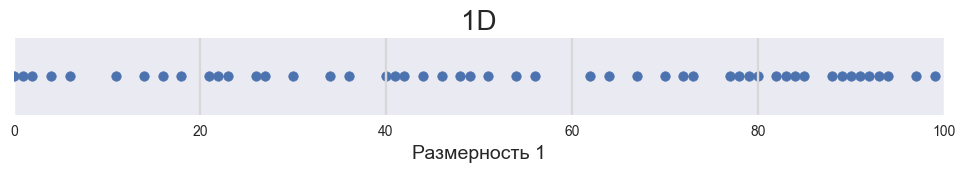

In [3]:
# Генерим 50 точек на отрезке

x = np.random.choice(range(0,100), size=50, replace=False)
y = np.zeros_like(x)

plt.figure(figsize=(12, 1))
plt.scatter(x, y)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')

plt.xlim((0,100))
plt.xlabel("Размерность 1", fontsize=14)
plt.ylabel("")
plt.yticks([], [])
plt.title("1D", fontsize=20);

Если нам нужно анализировать попадание случайной величины в каждый из пяти интервалов, у нас в среднем есть $\frac{50}{5} = 10$ наблюдений на одну ячейку.

 __Посмотрим на двумерный случай.__

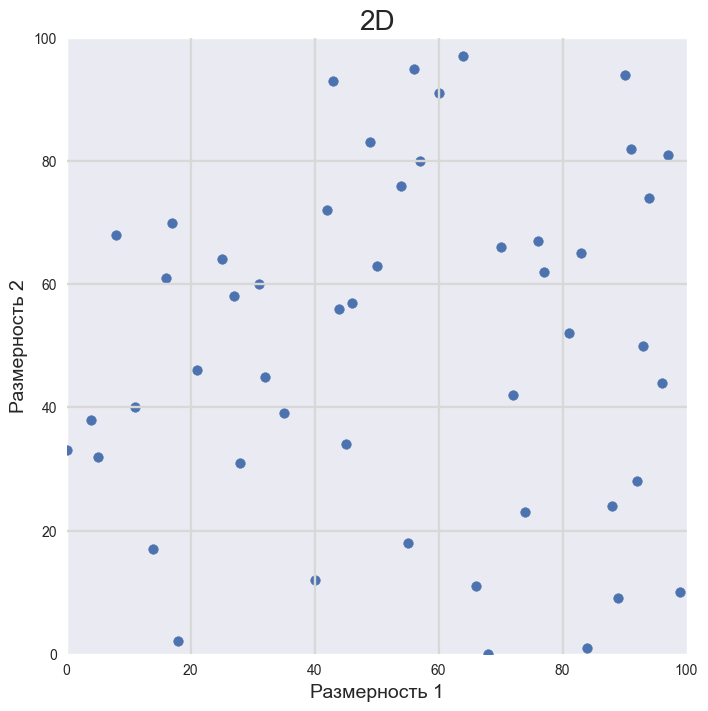

In [4]:
x = np.random.choice(range(0,100), size=50, replace=False)
y = np.random.choice(range(0,100), size=50, replace=False)

plt.figure(figsize = (8, 8))
plt.scatter(x, y)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')

plt.xlim((0,100))
plt.ylim((0,100))
plt.xlabel("Размерность 1", fontsize=14)
plt.ylabel("Размерность 2", fontsize=14)
plt.title("2D", fontsize=20);

У нас есть по $5$ интервалов в каждом измерении. Теперь на каждую ячейку приходится в среднем $\frac{50}{5 \cdot 5} = 2$ точки. Начинают возникать ячейки, в которых нам не хватает данных для работы. __Посмотрим на трёхмерный случай.__

Text(0.5, 0.92, '3D')

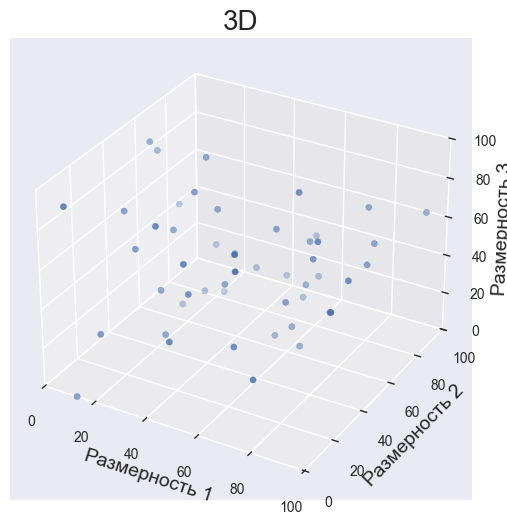

In [5]:
from mpl_toolkits import mplot3d

x = np.random.choice(range(0,100), size=50, replace=False)
y = np.random.choice(range(0,100), size=50, replace=False)
z = np.random.choice(range(0,100), size=50, replace=False)

fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(x, y, z)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ax.set_xlabel("Размерность 1", fontsize=14)
ax.set_ylabel("Размерность 2", fontsize=14)
ax.set_zlabel("Размерность 3", fontsize=14)
plt.title("3D", fontsize=20)

Появляется ещё $5$ интервалов на третьем измерении. В среднем на каждую ячейку мы получаем $\frac{50}{5 \cdot 5 \cdot 5} = 0.4$ наблюдения.

__C каждой новой размерностью появляется новое пространство.__ Нам нужно заполнять его $\Rightarrow$ число симуляций, необходимых для устойчивых выводов экспоненциально увеличивается.

- Для размерности $1$ нам надо покрыть точками $5$ ячеек
- Для размерности $2$ нам надо покрыть точками уже $5^2$ ячеек
- Для размерности $3$ нам надо покрыть точками уже $5^3$ ячеек

Если мы сгенерируем для размерности $1$ $50$ точек, в среднем в каждой ячейке окажется по $10$. Для размерности $2$ для такого же результата нам уже понадобится $250$ точек. Для размерности $10$ нужно будет $97656250$ точек.

Конечно, следует иметь в виду, что зачастую далеко не все области полученного пространства одинаково полезны для решения какой-либо задачи.

 Большая часть "информации" зачастую содержится в подпространстве куда меньшего размера, чем исходное. 
 
 Как такое подпространство признаков найти - этим занимаются методы снижения размерности из ML: от простого отбора признаков по дисперсии или корреляции до SHAP-values, PCA и куда более продвинутых методов, в том числе и из доменных областей


### 2. Вернемся к истокам: посчитаем число пи методом Монте-Карло

Площадь окружности с радиусом $1$:

$$
x^2 + y^2 = 1.
$$

Впишем окружность в квадрат $(0,0):(1,1)$, сгенерируем несколько точек в этом квадрате.

Text(0.5, 1.0, 'Оцененное число пи:  3.168')

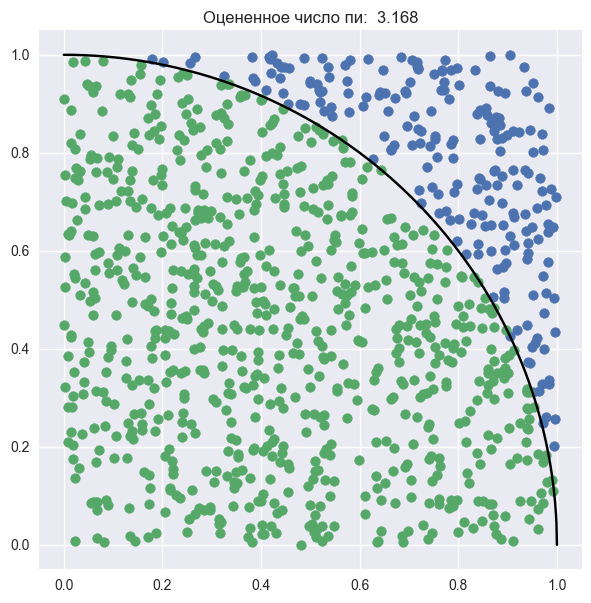

In [18]:
n_obs = 1000

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)

plt.figure(figsize=(7,7))

p = np.linspace(0, 1, 1000)
plt.plot(p, np.sqrt(1 - p**2), color='black')

usl = x**2 + y**2 > 1
plt.scatter(x[usl], y[usl])
plt.scatter(x[~usl], y[~usl])

pi_monte_carlo = 4* np.mean(x**2 + y**2 <= 1)

plt.title(f'Оцененное число пи:  {pi_monte_carlo}')

In [19]:
import math
math.pi

3.141592653589793

Получили число $\pi$. Чем больше симуляций мы сделаем, тем точнее оно будет.

Теперь попробуем получить его же, используя вместо окружности шар. Объём восьмой части шара можно посчитать по формуле:

$$ V = \frac{1}{8} \cdot \frac{4}{3} \cdot \pi \cdot R^3 \Rightarrow \pi = 8 \cdot \frac{3}{4} \cdot V $$

In [20]:
n_obs = 10**6

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)
z = np.random.uniform(0, 1, size=n_obs)

8 * 3/4 * np.mean(x**2 + y**2 + z**2 <= 1)

3.1447020000000006

Точность при том же числе генераций оказалась ниже. Теперь попробуем сделать то же самое, используя шар в $d$-мерном пространстве. Для его объёма можно получить формулу

$$
V = \frac{\pi^{\tfrac{d}{2}}}{\Gamma \left( \frac{d}{2}  + 1\right)} \cdot R^d,
$$

где $\Gamma(t)$ - гамма-функция. Она обобщает понятие факториала для непрерывного случая. Выразим число $\pi$

$$
\pi = \left(V \cdot \Gamma \left( \frac{d}{2} + 1 \right) \right)^\frac{2}{d}.
$$

In [21]:
from scipy.special import gamma

def find_pi(ndim, n_obs = 10**6):

    # сгенерировали точки
    x = [np.random.uniform(0, 1, size=n_obs) for _ in range(ndim)]

    dist = np.zeros(n_obs) # считаем расстояние от начала координат до точки
    for item in x:
         dist += item**2

    V = np.sum(dist <= 1)/n_obs  # объём фигуры

    # 2**ndim из-за того, что мы всегда смотрим на кусочек фигуры (1/4 окружности, 1/8 шара и тд)
    pi = (2**ndim * V * gamma((ndim/2)+1))**(2/ndim)
    return pi

In [22]:
find_pi(ndim=2)

3.141884

In [23]:
find_pi(ndim=3)

3.1458361185678902

In [24]:
find_pi(ndim=6)

3.1370792481392424

Попробуем посмотреть как мы будем приближаться к числу  π  в зависимости от размерности пространства, в котором происходят симуляции.

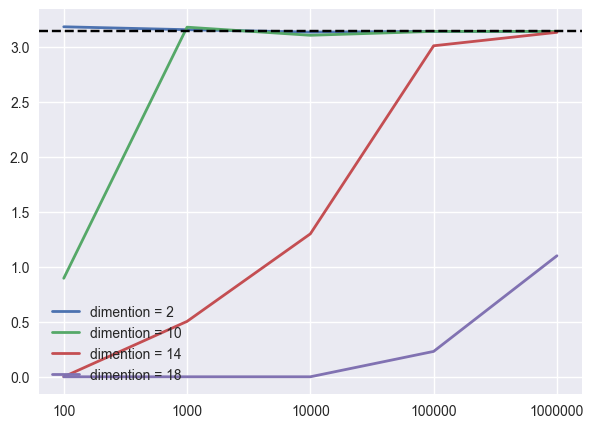

In [25]:
plt.figure(figsize=(7,5))

n_sim = [10**i for i in range(2, 7)]
dim = [2, 10, 14, 18]

for d in dim:        # размерность
    cur_res = [ ]

    for n in n_sim:  # число симуляций
        pi = [ ]

        for _ in range(20):            # каждый эксперимент проводим 20 раз
            pi.append(find_pi(d, n))   # и усредняем результат

        cur_res.append(np.mean(pi))

    plt.plot(range(2, 7), cur_res, label=f'dimention = {d}', lw=2)

plt.axhline(y=np.pi, color='black', linestyle='--')
plt.xticks(np.arange(2, len(n_sim)+2), n_sim)
plt.legend(loc='lower left')

По оси $x$ отложено число симуляций, по оси $y$ приближение числа $\pi$. Каждая траектория - приближение числа $\pi$ при разных размерностях пространства для симуляций. __Для более высоких размерностей требуетмя на порядок больше точек, чтобы получить число $\pi$ с высокой точностью.__

__Резюме__:

При работе с генерациями могут возникать проблемы:

- Сложности при генерации многомерных случайных величин (проклятье размерности)
- Сложности связанные с генерацией независимых случайных величин
- Сложности связанные со сходимостями последовательностей случайных величин не к тому распределению

Поэтому метод Монте-Карло хотя и изящен и прост, на практике зачастую оказывается очень ограниченным.

И зачастую является бейзлайном, порождается "безвыходностью" или используется лишь в конкретных частях решения

Собственно, ровно поэтому разививаются более "умные" способы объяснять или прогнозировать что-то: как в табличных данных, так и в доменных областях

## Основы линейной регрессии

### 1. Покажите, что TSS = RSS+ESS на примере парной линейной регрессии с константой


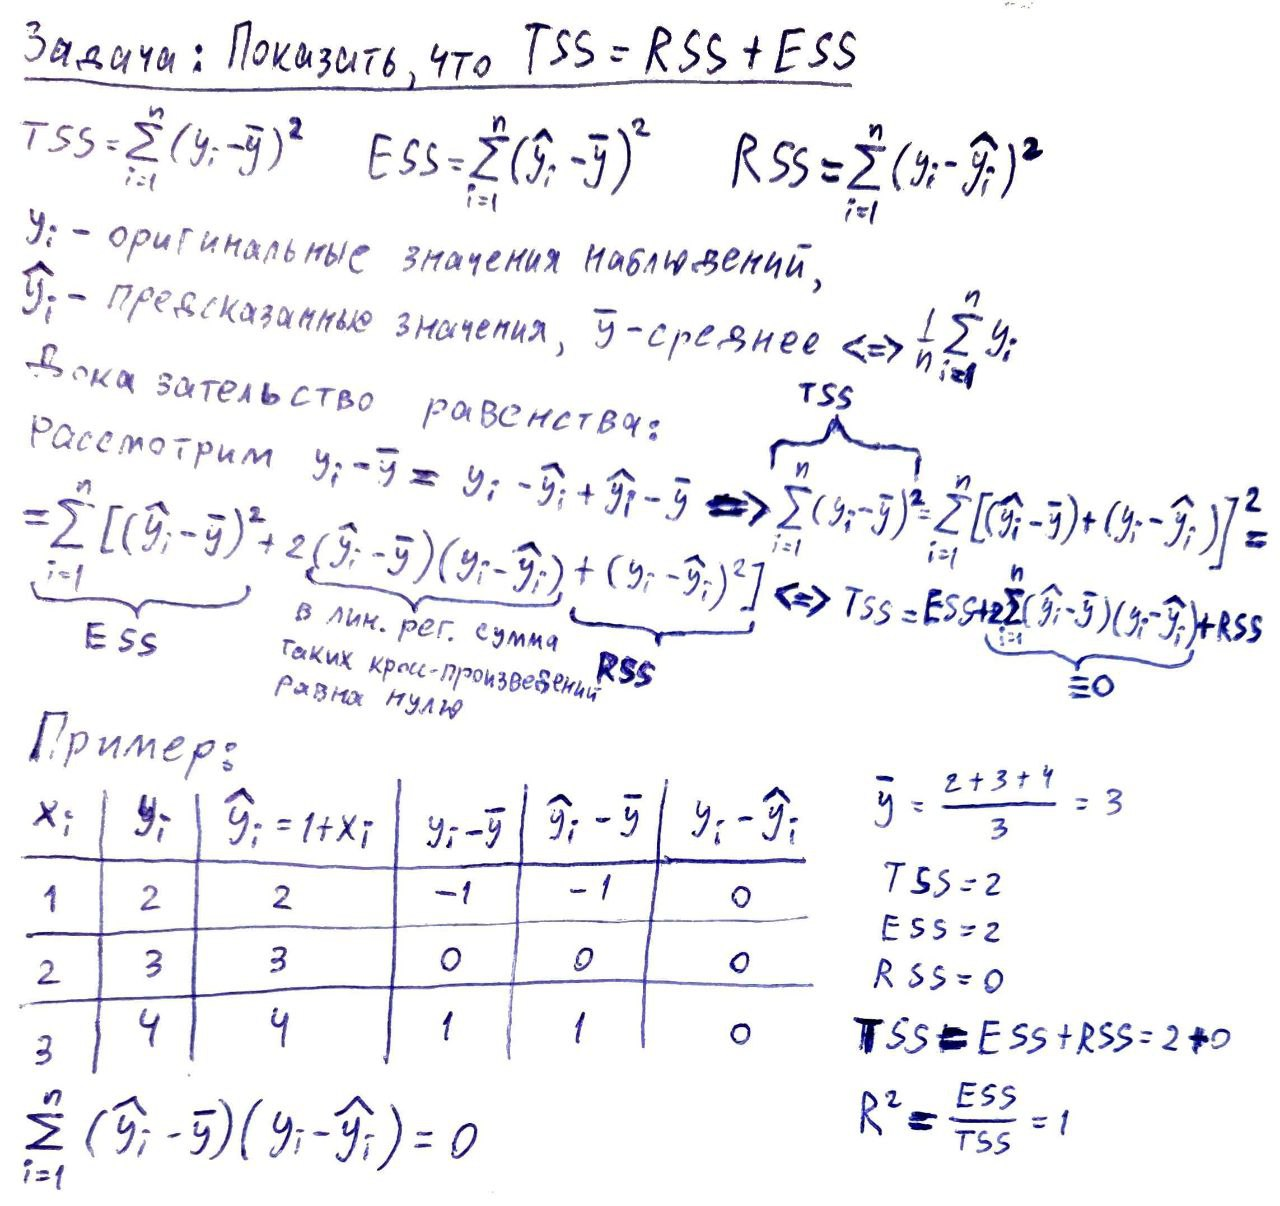

### 2. Всегда ли TSS = RSS+ESS?

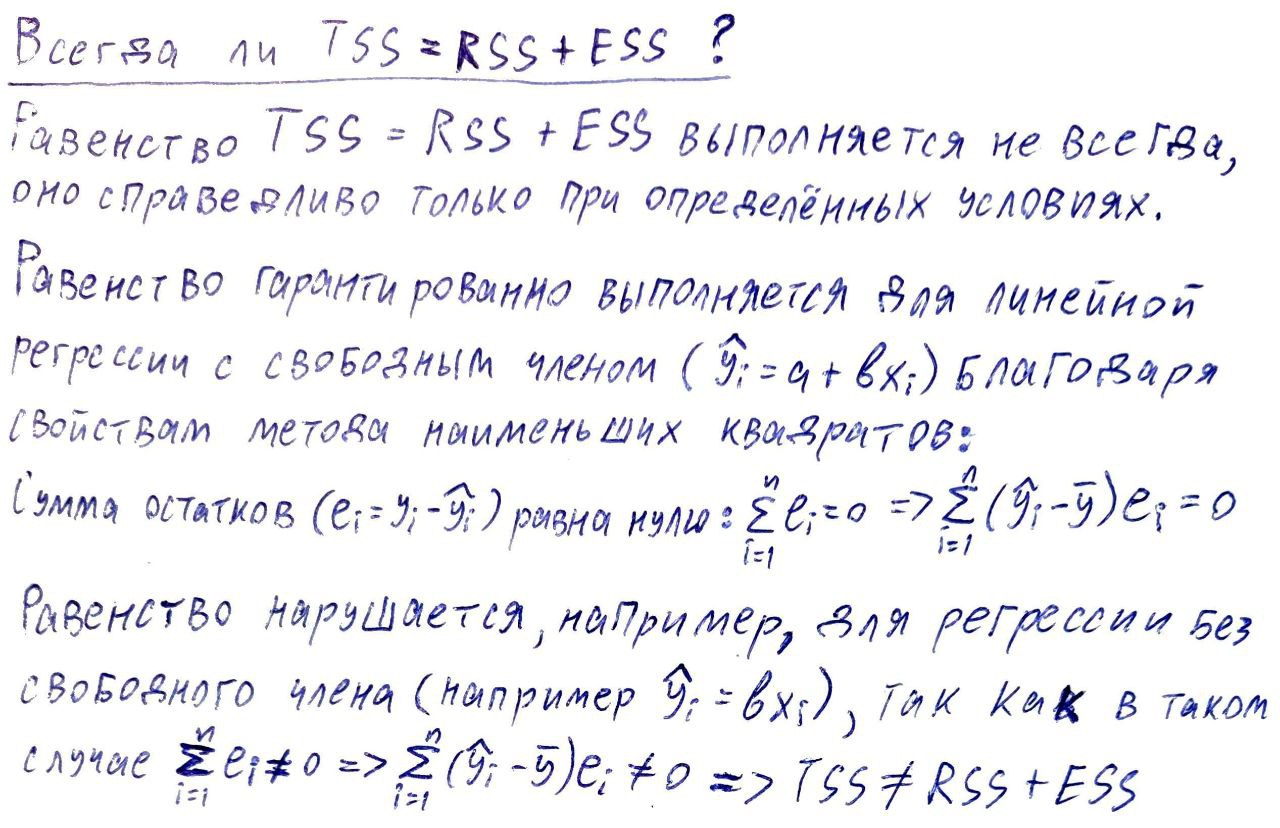

### 3. Напишем свой класс линейной регрессии

Основываясь на фактах, которые узнали и вывели на лекции

In [3]:
import scipy as sp
import numpy as np
from scipy.stats import t

class LinearRegression():
  def __init__(self, regularize = 0):
    self.regularize = 0

  def fit(self, X, y):
    '''
    X vector of shape(n_observations, n_features)
    y vector of shape  (n_observations, 1)
    returns beta of shape n_features
    '''
    self.n_observations = X.shape[0]
    self.n_features =  X.shape[1]
    assert X.shape[0] == len(y)

    self.X = np.array(X)
    self.y = np.array(y)
    self.beta  = np.linalg.inv(self.X.T@self.X)@self.X.T@self.y
    return self.beta

  def RSS(self):
    return np.sum((self.y - self.X@self.beta)**2)

  def predict(self, X):

    return X@self.beta

  def standard_deviation_beta(self):

      sigma_hat = self.RSS()/(self.n_observations - self.n_features)
      return sigma_hat * np.linalg.inv(self.X.T@self.X)

  def t_test_siginificance(self, alpha_critical):
    '''
    alpha_critical is prob to reject H_o
    '''
    betas_info ={}
    for k in range(self.n_features):
      t_st_beta_k = self.beta[k]/(np.sqrt(self.standard_deviation_beta()[k, k]))
      t_cdf = t.cdf(t_st_beta_k, df = self.n_observations - self.n_features )

      if alpha_critical / 2 < t_cdf < 1 - alpha_critical / 2:
        is_significant = False
        #print(f"fail to reject H_0 that coeffiecint of {k} feature is eqaul to 0 at level {alpha_critical}","non significant")

      else:
        is_significant = True
        #print(f"reject H_0 that coeffiecint of {k} feature is eqaul to 0 at level {alpha_critical}", "significant")
      betas_info[k] = {"t statistics":round(t_st_beta_k, 3),
                       "p_value": round(2*min(1-t_cdf, t_cdf), 3),
                       "is_significant":is_significant}
    return betas_info

  def R_squared(self):
    return 1 - self.RSS() / np.sum((self.y-np.mean(self.y))**2)

Подгрузим датасет longley из библиотеки statsmodels.api.datasets

Оценим модель

Проверим гипотезу, что $\beta_2 = 0$

In [ ]:
import numpy as np
import statsmodels.api as sm

data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
results = sm.OLS(data.endog, data.exog).fit()
results.tvalues

const     -3.910803
GNPDEFL    0.177376
GNP       -1.069516
UNEMP     -4.136427
ARMED     -4.821985
POP       -0.226051
YEAR       4.015890
dtype: float64

In [4]:
# Cравним с нашим кастомным классом

lin_reg1= LinearRegression()
lin_reg1.fit(X =data.exog,y = data.endog)
lin_reg1.t_test_siginificance(alpha_critical =0.05)

{0: {'t statistics': -3.911, 'p_value': 0.004, 'is_significant': True},
 1: {'t statistics': 0.177, 'p_value': 0.863, 'is_significant': False},
 2: {'t statistics': -1.07, 'p_value': 0.313, 'is_significant': False},
 3: {'t statistics': -4.136, 'p_value': 0.003, 'is_significant': True},
 4: {'t statistics': -4.822, 'p_value': 0.001, 'is_significant': True},
 5: {'t statistics': -0.226, 'p_value': 0.826, 'is_significant': False},
 6: {'t statistics': 4.016, 'p_value': 0.003, 'is_significant': True}}

In [5]:
display(results.summary())

c:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                 Сб, 18 окт 2025   Prob (F-statistic):           4.98e-10
Time:                        07:47:56   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.004    -5.5e+06   -1.47e+06
GNPDEFL       15.0619     84.915      0.177      0.863    -177.029     207.153
GNP           -0.0358      0.033     -1.070      0.313      -0.112       0.040
UNEMP         -2.0202      0.488     -4.136      0.003      -3.125      -0.915
ARMED         -1.0332      0.214     -4.822      0.001      -1.518      -0.549
POP           -0.0511      0.226     -0.226      0.826      -0.563       0.460
YEAR        1829.1515    455.478      4.016      0.003     798.788    2859.515
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     4.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4. F-тест

F-тест можно использовать не только для проверки одновременного равенства всех коэффицинтов нулю

Но и для проверки ограничений на коэффициенты модели (стоит вводить/не стоит)

Тестовая статистика в данном случае будет выглядеть как:
$$\frac{(RSS_{R} - RSS_{UR})/r}{ RSS_{UR}/(n-p)}  \sim F(r,n-p)$$


Пример: тестируем гипотезу,что $\beta_1+\beta_2 = 1$


Функция: прологарифмированорованная функция выпуска Кобба-Дугласа, где
тестируем гипотезу что коэффициенты суммируются в единицу (функция обладает однородностью степени 1).

* Данные: Капитал K и Труд L

* Модель: $Y =\gamma K^{\alpha} L^{\lambda} $

Хотим оценить $\gamma $, $\alpha$, $\lambda $

Чтобы построить линейную модель, нужно взять логарифм от левой и правой части модельного уравнения.

Хотим проверить гипотезу, что функция производительности гомогенная, то есть Y  увеличивается пропорционально увеличению K и L.

Проверяем гипотезу: $\alpha+\lambda = 1$

In [6]:
# Сгенерируем данные
import numpy as np
K = np.linspace(10,60,1000)+np.random.randint(-5, 5)
L = np.linspace(100,600,1000)+np.random.randint(-20, 20)
true_alpha = 0.4
true_gamma = 4
Y = true_gamma * K**(true_alpha)* L**(1-true_alpha)+np.random.randn(len(K))

В нашем случае количество переменных $p = 2$,  количество ограничений $r = 1$  и количество наблюдений $n = 100$

In [7]:
#unconstrained regression:
lin_reg_uncostrained = LinearRegression()
X = np.stack([np.ones_like(K), np.log(K), np.log(L)]).T
print(X.shape)
y = np.log(Y)
lin_reg_uncostrained.fit(X, y)
RSS_UR = lin_reg_uncostrained.RSS()

print("coeffs unconstrained",lin_reg_uncostrained.beta)
#constrained regression:
lin_reg_costrained = LinearRegression()
X_r = np.stack([np.ones(len(K)), np.log(K) - np.log(L)]).T
y_r = np.log(Y) - np.log(L)
lin_reg_costrained.fit(X_r, y_r)
RSS_R = lin_reg_costrained.RSS()
print("coeffs constrained",lin_reg_costrained.beta)

n = len(K)
p = 2
r = 1
F_st = (RSS_R-RSS_UR)*(n-p)/(RSS_UR*r)

print("F statistics : ", F_st)
p_value = 1-sp.stats.f.cdf(F_st, dfn = r , dfd = n-p, loc=0, scale=1)
print("p-value", p_value)

(1000, 3)
coeffs unconstrained [1.39642425 0.40374085 0.59605184]
coeffs constrained [1.38863683 0.40095749]
F statistics :  0.08581880807542656
p-value 0.7696224350998101


p-value больше любого разумного уровня значимости, не имеем права отвергать H0

### 5. Сравним с LinReg в sklearn

Sklearn является либой для машинного обучения, а значит ее базовый функцинал не очень заточен на проверку гипотез и стат. значимость

Тем не менее, мы также можем выводить оценки коэффициентов, считать MSE и коэффициент детерминации

Но, чтобы вывести здесь аналог summary из statsmpdels.api, придется попотеть и писать кастом (скорее всего)

- Но нужно ли оно нам вообще для задач машинного обучения?

Coefficients: 
 [953.3606272]
Mean squared error: 3752.77
Coefficient of determination: 0.38


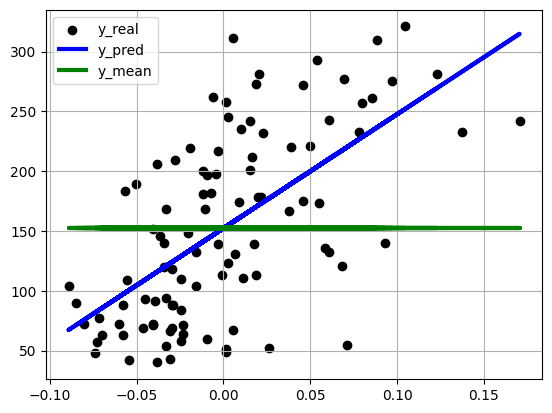

In [8]:

import sklearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-100]
diabetes_X_test = diabetes_X[-100:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-100]
diabetes_y_test = diabetes_y[-100:]

# Create linear regression object
regr = LinearRegression(fit_intercept = True,)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black", label='y_real')
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3, label='y_pred')
plt.plot(diabetes_X_test, np.full((len(diabetes_X_test), 1), diabetes_y_test.mean()),
         color='green', linewidth=3, label='y_mean')

plt.legend()
plt.grid()
plt.xticks()
plt.yticks()

plt.show()